# 📘 YOLO
- [docs.ultralytics](https://docs.ultralytics.com/models/yolo12/#detection-performance-coco-val2017)

## 📌 前置準備

```python
# 安裝必要套件（請依實際環境確認是否已安裝）
!pip install ultralytics wandb opencv-python

In [3]:
!pip install opencv-python

In [6]:
# 匯入必要模組
from ultralytics import YOLO
import os
import cv2
import numpy as np
from IPython.display import Image, display

## image

In [8]:
model = YOLO("./checkpoints/yolov8n.pt")
image_path = "./images/example.jpg"
results = model(image_path)
results[0].show()  
results[0].save(filename="./results/example.jpg")


image 1/1 d:\workplace\project_management\my_github\yolo_dev\images\example.jpg: 448x640 16 persons, 1 backpack, 33.5ms
Speed: 1.3ms preprocess, 33.5ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)


'./results/example.jpg'

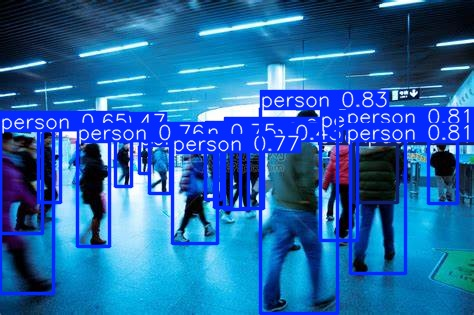

In [10]:
display(Image(filename="./results/example.jpg"))

## Video

In [12]:
from ultralytics import YOLO
import cv2
import os

# 初始化 YOLO 模型（使用您訓練或下載的模型檔）
model = YOLO("./checkpoints/yolo11x.pt")

# 影片路徑與輸出設定
input_video_path = "./videos/example.mp4"
output_video_path = "./results/example.mp4"

# 開啟輸入影片
cap = cv2.VideoCapture(input_video_path)
assert cap.isOpened(), f"無法開啟影片: {input_video_path}"

# 讀取影片屬性
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 可改為 'XVID' 或 'avc1'

# 建立影片寫入器
os.makedirs(os.path.dirname(output_video_path), exist_ok=True)
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_idx = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 使用 YOLO 模型進行推論
    results = model(frame, verbose=False)  # 預設會返回一個 Results 物件 list

    # 取得加上偵測結果的圖像
    annotated_frame = results[0].plot()  # 回傳 numpy array with bounding boxes

    # 寫入輸出影片
    out.write(annotated_frame)

    frame_idx += 1
    if frame_idx % 30 == 0:
        print(f"處理第 {frame_idx} 幀")

# 釋放資源
cap.release()
out.release()
print(f"影片處理完成，已儲存至: {output_video_path}")


100%|██████████| 109M/109M [00:02<00:00, 38.3MB/s] 


處理第 30 幀
處理第 60 幀
處理第 90 幀
處理第 120 幀
處理第 150 幀
處理第 180 幀
處理第 210 幀
處理第 240 幀
處理第 270 幀
處理第 300 幀
處理第 330 幀
處理第 360 幀
影片處理完成，已儲存至: ./results/example.mp4


In [13]:
from ultralytics import SAM

# Load a model
model = SAM("./checkpoints/sam2.1_b.pt")

# Display model information (optional)
model.info()

# Run inference
model("./videos/example.mp4")

100%|██████████| 154M/154M [00:04<00:00, 32.8MB/s] 


Model summary: 403 layers, 80,850,178 parameters, 80,850,178 gradients


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 44650.2ms
video 1/1 (frame 2/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 44870.4ms
video 1/1 (frame 3/379) d:\workplace\project_

KeyboardInterrupt: 

In [ ]:
from ultralytics.models.sam import SAM2VideoPredictor

# Create SAM2VideoPredictor
overrides = dict(conf=0.25, task="segment", mode="predict", imgsz=1024, model="./checkpoints/sam2_b.pt")
predictor = SAM2VideoPredictor(overrides=overrides)

# Run inference with single point
results = predictor(source="./videos/example.mp4", points=[920, 470], labels=[1])

# Run inference with multiple points
# results = predictor(source="test.mp4", points=[[920, 470], [909, 138]], labels=[1, 1])

# # Run inference with multiple points prompt per object
# results = predictor(source="test.mp4", points=[[[920, 470], [909, 138]]], labels=[[1, 1]])

# # Run inference with negative points prompt
# results = predictor(source="test.mp4", points=[[[920, 470], [909, 138]]], labels=[[1, 0]])

video_path = "./videos/example.mp4"
cap = cv2.VideoCapture(video_path)
assert cap.isOpened(), f"無法開啟影片: {video_path}"
fps = cap.get(cv2.CAP_PROP_FPS)
cap.release()

first_result = next(iter(results))
first_frame = first_result.plot()
height, width = first_frame.shape[:2]

output_path = "./results/example_sam2_segmented_output.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

for i, result in enumerate(results):
    frame = result.plot()
    if frame.shape[0:2] != (height, width):
        frame = cv2.resize(frame, (width, height))  # 保險起見強制統一大小
    out.write(frame)
    if i % 30 == 0:
        print(f"寫入第 {i} 幀")

out.release()
print(f"✅ 已完成影片輸出: {output_path}")


Ultralytics 8.3.103  Python-3.11.11 torch-2.6.0+cpu CPU (Intel Core(TM) i9-14900KF)


100%|██████████| 154M/154M [00:05<00:00, 31.8MB/s] 


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



video 1/1 (frame 1/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 2257.1ms
video 1/1 (frame 2/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 1391.8ms
video 1/1 (frame 3/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 1627.5ms
video 1/1 (frame 4/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 1624.6ms
video 1/1 (frame 5/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 1767.9ms
video 1/1 (frame 6/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 1976.0ms
video 1/1 (frame 7/379) d:\workplace\project_management\my_github\yolo_dev\videos\example.mp4: 1024x1024 (no detections), 2157.4ms
video 1/1 (frame 8/379) d:\workplace\project_management\my_github\yolo_dev\videos\e

### Yolo Seg & Tracking

In [ ]:
from ultralytics import YOLO
import cv2

# 載入預訓練的 YOLO 分割模型
model = YOLO("./checkpoints/yolov8n-seg.pt")  # 或其他適合的模型權重
# 執行追蹤
results = model.track(source="./videos/example.mp4", show=True) # , tracker="bytetrack.yaml"
first_frame = results[0].plot()
height, width = first_frame.shape[:2]

# 設定輸出影片的參數
output_video_path = "./results/example_track_by_yolo_seg.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 30  # 根據原始影片的幀率設定
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

for result in results:
    # 繪製帶有分割與追蹤標註的影像
    annotated_frame = result.plot()
    out.write(annotated_frame)

out.release()


100%|██████████| 6.74M/6.74M [00:02<00:00, 2.82MB/s]
